# Restaurant Sentiment Analysis

## Introduction
These are the comments made by the customers in the restaurant. 
* If customer comment: 
   * If positive "1"
   * If negative "0" 
![image.png](https://storage.googleapis.com/kaggle-datasets-images/1512034/2497256/20cd8d4cee7d9d942a85ac789de81fc4/dataset-cover.jpg?t=2021-08-04-07-35-13)

## Content
1. [Import Data](#1)
1. [Missing Value](#2)
1. [Visualization](#3)
1. [Text Prepocessing](#4)
1. [Model](#5)
1. [Train Test Split](#6)
1. [Training](#7)
1. [Conclusion](#8)

<a id = "1"></a><b>
## Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Restaurant_Reviews.tsv", sep = "\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


<a id = "2"></a><b>
## Missing Value

In [3]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

* Eksik veri bulunmamaktadır.

<a id = "3"></a><b>
## Visualization

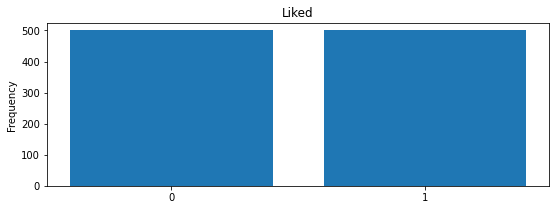

Liked: 
 1    500
0    500
Name: Liked, dtype: int64


In [4]:
var = df["Liked"]
    
# count number of categorical variable 
varValue = var.value_counts()

plt.figure(figsize = (9, 3))
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title("Liked")
plt.show()
print("{}: \n {}".format("Liked", varValue))

* Positive (1) = 500
* Negative (0) = 500

<a id = "4"></a><b>
## Text Prepocessing

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
lemmatise=  WordNetLemmatizer() 

* split kullanırsak "shouldn't" gibi kelimeler "should" ve "n't" olarak ayrılmaz
* Tokenizer kullanırsak ayrılır

In [6]:
cleaned_text2=[]
for i in range(0,len(df)):
    # a dan z ye ve A dan Z ye kadar olan harfleri bulur, geri kalanları " " (boşluk) ile yer değişti
    text = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    # Texti sınıflandırma yapabilmemiz için bütün kelimeleri küçük harf yaparız.
    text=text.lower()
    
    # text = text.split()
    text = nltk.word_tokenize(text)
    text = [lemmatise.lemmatize(j) for j in text if not j in set(stopwords.words('english'))]
    text = ' '.join(text)
    cleaned_text2.append(text)

In [7]:
cleaned_text2[0:10]# in lemmatization we get the complete word

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch']

<a id = "5"></a><b>
## Model

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x = tfidf.fit_transform(cleaned_text2).toarray() 
y = df[["Liked"]]

* Vectorizer modelini kullanırız

In [9]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


<a id = "6"></a><b>
## Train Test Split

In [11]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.33, random_state = 0)

<a id = "7"></a><b>
## Training

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
#using naivebayes classifier
from sklearn.naive_bayes import MultinomialNB
gaussian_model = MultinomialNB()
gaussian_model.fit(x_train,y_train)
gaussian_predict = gaussian_model.predict(x_test)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
gaussian_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [15]:
gaussian_accuracy = accuracy_score(y_test,gaussian_predict)
gaussian_accuracy

0.7636363636363637

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 12)
knn_model.fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [17]:
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_accuracy

0.7575757575757576

In [18]:
score_list = []

for each in range(1, 50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
    print("K =",each,"Accuracy:",knn2.score(x_test,y_test))

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: 

K = 1 Accuracy: 0.6909090909090909
K = 2 Accuracy: 0.703030303030303
K = 3 Accuracy: 0.7484848484848485
K = 4 Accuracy: 0.7272727272727273
K = 5 Accuracy: 0.7121212121212122
K = 6 Accuracy: 0.7212121212121212


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: 

K = 7 Accuracy: 0.7242424242424242
K = 8 Accuracy: 0.7424242424242424
K = 9 Accuracy: 0.7242424242424242
K = 10 Accuracy: 0.7303030303030303
K = 11 Accuracy: 0.7333333333333333
K = 12 Accuracy: 0.7575757575757576


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: 

K = 13 Accuracy: 0.7575757575757576
K = 14 Accuracy: 0.7393939393939394
K = 15 Accuracy: 0.7393939393939394
K = 16 Accuracy: 0.7393939393939394
K = 17 Accuracy: 0.7424242424242424


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: 

K = 18 Accuracy: 0.7454545454545455
K = 19 Accuracy: 0.7424242424242424
K = 20 Accuracy: 0.7303030303030303
K = 21 Accuracy: 0.7242424242424242
K = 22 Accuracy: 0.7363636363636363
K = 23 Accuracy: 0.7393939393939394


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: 

K = 24 Accuracy: 0.7303030303030303
K = 25 Accuracy: 0.7151515151515152
K = 26 Accuracy: 0.7181818181818181
K = 27 Accuracy: 0.7181818181818181
K = 28 Accuracy: 0.7121212121212122
K = 29 Accuracy: 0.7


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: 

K = 30 Accuracy: 0.7
K = 31 Accuracy: 0.6909090909090909
K = 32 Accuracy: 0.6909090909090909
K = 33 Accuracy: 0.6909090909090909
K = 34 Accuracy: 0.6909090909090909
K = 35 Accuracy: 0.6727272727272727


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: 

K = 36 Accuracy: 0.6848484848484848
K = 37 Accuracy: 0.693939393939394
K = 38 Accuracy: 0.6878787878787879
K = 39 Accuracy: 0.6757575757575758
K = 40 Accuracy: 0.6909090909090909
K = 41 Accuracy: 0.6727272727272727


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: 

K = 42 Accuracy: 0.6727272727272727
K = 43 Accuracy: 0.6757575757575758
K = 44 Accuracy: 0.6818181818181818
K = 45 Accuracy: 0.6666666666666666
K = 46 Accuracy: 0.693939393939394
K = 47 Accuracy: 0.6787878787878788
K = 48 Accuracy: 0.6878787878787879
K = 49 Accuracy: 0.6787878787878788


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: 

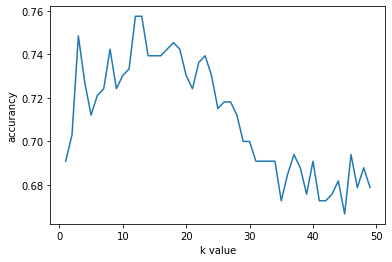

In [19]:
plt.plot(range(1, 50), score_list)
plt.xlabel("k value")
plt.ylabel("accurancy")
plt.show()

Best accuracy value:
* K = 12 Accuracy: 0.75
* K = 13 Accuracy: 0.75

<a id = "8"></a><b>
## Conclusion

* KNN accuracy: 0.75
* Gaussian accuracy: 0.76